#### Tarea 6
Hacer 3 figuras GIF con los promedios de precipitación de verano (DJF) para la región del Altiplano, para los años de cada periodo de simulación.

In [3]:
import glob
import numpy as np
import pandas as pd
import xarray as xr
import dask.array as da
import os
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import cartopy.io.shapereader as shpreader
import cartopy.io.img_tiles as cimgt
import matplotlib.pyplot as plt
import cartopy.mpl.geoaxes
from matplotlib import pyplot as plt, animation
from IPython.display import HTML, display
import imageio  # GIFS

In [4]:
# Directorio de las salidas WRF 2003-2004
PATH = 'E:/2022-08 WRF python work/WRF data/'
# Abrimos dataset: orography_era5_remaped_latlon_05deg_masl
OROGRAFIA = xr.open_dataset(f'{PATH}orography_era5_remaped_latlon_05deg_masl.nc', chunks=-1)
OROGRAFIA

<xarray.Dataset>
Dimensions:  (lon: 131, lat: 111)
Coordinates:
  * lon      (lon) float64 -90.0 -89.5 -89.0 -88.5 ... -26.5 -26.0 -25.5 -25.0
  * lat      (lat) float64 -40.0 -39.5 -39.0 -38.5 -38.0 ... 13.5 14.0 14.5 15.0
Data variables:
    z        (lat, lon) float32 dask.array<chunksize=(111, 131), meta=np.ndarray>
Attributes:
    CDI:          Climate Data Interface version ?? (http://mpimet.mpg.de/cdi)
    Conventions:  CF-1.6
    history:      Fri Jun 16 11:46:41 2023: cdo -divc,9.81 ororgraphy_era5_re...
    CDO:          Climate Data Operators version 1.9.3 (http://mpimet.mpg.de/...

In [5]:
dataset_2003_2004 = xr.open_dataset(f'{PATH}2003_2004/monthly_2003_90y.nc', chunks=-1)
dataset_2003_2004

<xarray.Dataset>
Dimensions:       (air_pressure: 11, Time: 1081, lat: 111, lon: 131)
Coordinates:
  * air_pressure  (air_pressure) float64 100.0 200.0 300.0 ... 800.0 900.0 1e+03
  * Time          (Time) datetime64[ns] 2003-06-01 2003-07-01 ... 2093-06-01
  * lat           (lat) float64 -40.0 -39.5 -39.0 -38.5 ... 13.5 14.0 14.5 15.0
  * lon           (lon) float64 -90.0 -89.5 -89.0 -88.5 ... -26.0 -25.5 -25.0
Data variables: (12/15)
    U10           (Time, lat, lon) float32 dask.array<chunksize=(1081, 111, 131), meta=np.ndarray>
    V10           (Time, lat, lon) float32 dask.array<chunksize=(1081, 111, 131), meta=np.ndarray>
    SNOW          (Time, lat, lon) float32 dask.array<chunksize=(1081, 111, 131), meta=np.ndarray>
    RAINC         (Time, lat, lon) float32 dask.array<chunksize=(1081, 111, 131), meta=np.ndarray>
    RAINNC        (Time, lat, lon) float32 dask.array<chunksize=(1081, 111, 131), meta=np.ndarray>
    PREC_ACC_C    (Time, lat, lon) float32 dask.array<chunksize=(1081, 111, 131), meta=np.ndarray>
    ...            ...
    theta_eq      (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(1081, 11, 111, 131), meta=np.ndarray>
    wind_east     (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(1081, 11, 111, 131), meta=np.ndarray>
    wind_north    (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(1081, 11, 111, 131), meta=np.ndarray>
    W             (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(1081, 11, 111, 131), meta=np.ndarray>
    hus           (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(1081, 11, 111, 131), meta=np.ndarray>
    ta            (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(1081, 11, 111, 131), meta=np.ndarray>

In [6]:
dataset_2011_2012 = xr.open_dataset(f'{PATH}2011_2012/monthly_2011_50y.nc', chunks=-1)
dataset_2011_2012 = dataset_2011_2012
dataset_2011_2012

<xarray.Dataset>
Dimensions:       (air_pressure: 11, Time: 600, lat: 111, lon: 131)
Coordinates:
  * air_pressure  (air_pressure) float64 100.0 200.0 300.0 ... 800.0 900.0 1e+03
  * Time          (Time) datetime64[ns] 2011-07-01 2011-08-01 ... 2061-06-01
  * lat           (lat) float64 -40.0 -39.5 -39.0 -38.5 ... 13.5 14.0 14.5 15.0
  * lon           (lon) float64 -90.0 -89.5 -89.0 -88.5 ... -26.0 -25.5 -25.0
Data variables: (12/15)
    U10           (Time, lat, lon) float32 dask.array<chunksize=(600, 111, 131), meta=np.ndarray>
    V10           (Time, lat, lon) float32 dask.array<chunksize=(600, 111, 131), meta=np.ndarray>
    SNOW          (Time, lat, lon) float32 dask.array<chunksize=(600, 111, 131), meta=np.ndarray>
    RAINC         (Time, lat, lon) float32 dask.array<chunksize=(600, 111, 131), meta=np.ndarray>
    RAINNC        (Time, lat, lon) float32 dask.array<chunksize=(600, 111, 131), meta=np.ndarray>
    PREC_ACC_C    (Time, lat, lon) float32 dask.array<chunksize=(600, 111, 131), meta=np.ndarray>
    ...            ...
    theta_eq      (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(600, 11, 111, 131), meta=np.ndarray>
    wind_east     (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(600, 11, 111, 131), meta=np.ndarray>
    wind_north    (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(600, 11, 111, 131), meta=np.ndarray>
    W             (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(600, 11, 111, 131), meta=np.ndarray>
    hus           (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(600, 11, 111, 131), meta=np.ndarray>
    ta            (Time, air_pressure, lat, lon) float32 dask.array<chunksize=(600, 11, 111, 131), meta=np.ndarray>

# 2003-2004

In [7]:
# Para este trabajo solo se utilizará las variables PREC.
# PREC_ACC_C: Precipitación Instantanea Convectiva (mensual).
# PREC_ACC_NC: Precipitación Instantanea no Convectiva (mensual).
# Para calcular la precipitacion total de un  periodo utilizamos la funcion .sum()
PREC_ACC_C = dataset_2003_2004["PREC_ACC_C"].resample(Time='QS-DEC').sum(dim=('Time'))
PREC_ACC_NC = dataset_2003_2004["PREC_ACC_NC"].resample(Time='QS-DEC').sum(dim=('Time'))
SNOW = dataset_2003_2004["SNOW"].resample(Time='QS-DEC').sum(dim=('Time'))


In [8]:
# OBS: verificar el tiempo seleccionado pertenezca efectivamente al trimestre que se le asigna.
# PREC_ACC_C, PREC_ACC_NC y SNOW del trimestre DJF
PREC_ACC_C_DJF = PREC_ACC_C[2::4]
PREC_ACC_NC_DJF = PREC_ACC_NC[2::4]
PREC_TOTAL_DJF = PREC_ACC_C_DJF + PREC_ACC_NC_DJF
SNOW_DJF = SNOW[2::4]
print(PREC_TOTAL_DJF.shape)
print(PREC_ACC_C_DJF.Time)

(90, 111, 131)
<xarray.DataArray 'Time' (Time: 90)>
array(['2003-12-01T00:00:00.000000000', '2004-12-01T00:00:00.000000000',
       '2005-12-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-12-01T00:00:00.000000000', '2008-12-01T00:00:00.000000000',
       '2009-12-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-12-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-12-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-12-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-12-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '2019-12-01T00:00:00.000000000', '2020-12-01T00:00:00.000000000',
       '2021-12-01T00:00:00.000000000', '2022-12-01T00:00:00.000000000',
       '2023-12-01T00:00:00.000000000', '2024-12-01T00:00:00.000000000',
       '2025-12-01T00:00:00.000000000', '2026-12-01T00:00:00.000000000',
       '2027-12-01T00:00:00.000000000', '2028-12-01T00:00:00.000000000',

In [19]:
# Declaramos el altiplano con la orografia en las regiones lat = (-25, -18), lon = (-70,-65)
altiplano = OROGRAFIA['z'].sel(lat=slice(-26, -16), lon=slice(-72, -62))
altiplano

<xarray.DataArray 'z' (lat: 21, lon: 21)>
dask.array<getitem, shape=(21, 21), dtype=float32, chunksize=(21, 21), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -72.0 -71.5 -71.0 -70.5 ... -63.5 -63.0 -62.5 -62.0
  * lat      (lat) float64 -26.0 -25.5 -25.0 -24.5 ... -17.5 -17.0 -16.5 -16.0
Attributes:
    regrid_method:  bilinear

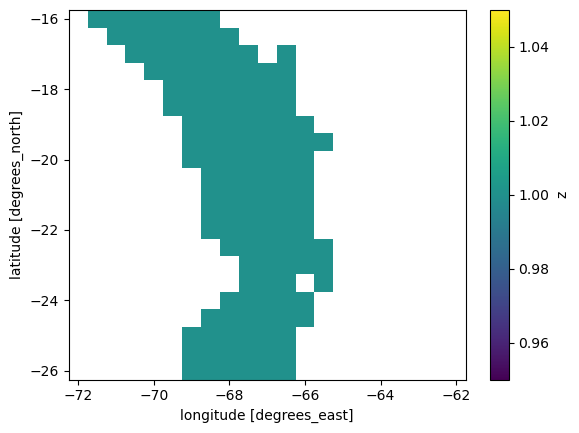

In [20]:
# Filtramos con la orografia sudamerica con un filtro de 3500 mtrs
altiplano_3500 = xr.where(altiplano < 3500, float('nan'), 1) 
altiplano_3500.plot()

In [21]:
# Valores PREC_TOTAL y SNOW para altiplano 3500 trimestre DJF
PREC_TOTAL_DJF_ALTIPLANO =  altiplano_3500 * PREC_TOTAL_DJF
SNOW_DJF_ALTIPLANO =  altiplano_3500 * SNOW_DJF


In [34]:
# graficamos Y GUARDAMOS LAS IMAGENES QUE UTILIZAREMOS PARA EL GIF
# En este caso graficaremos y guardaremos 16 tiempos
for i in range(0,90,5):
    fig, axs = plt.subplots(
        subplot_kw={"projection": ccrs.PlateCarree()}, figsize=(14, 6))

    # Plot vertical wind levels
    PREC_PLOT = PREC_TOTAL_DJF_ALTIPLANO[:, :, i].plot(
        robust=True,  # Use 98th and 2nd percentiles for color range
        cmap="viridis_r",  # Color map
        levels=np.arange(-1, 1100, 75),  # Levels for coloring
        rasterized=True,
        alpha=1,
        add_colorbar=False
    )

    # Add coastlines and borders
    axs.coastlines(linewidth=2, color='k')
    axs.add_feature(cfeature.BORDERS, linestyle="-",
                    color='k', alpha=0.8, linewidth=2)
    # Add colorbar

    cb = fig.colorbar(PREC_PLOT,
                      ax=axs,
                      pad=0.02,
                      extend="neither",
                      orientation="vertical",
                      label='total DJF precipitation',
                      shrink=0.75
                      )
    # Set colorbar label size
    cb.ax.tick_params(labelsize=12)
    cb.set_ticks(np.arange(0, 1100, 250))  # Set colorbar ticks
    cb.minorticks_off()
    # Add gridlines
    axs.gridlines(draw_labels=["left", "bottom"],
                  linewidth=1,
                  color='k',
                  alpha=0.8,
                  linestyle=':')
    # Set the extent of the image
    axs.set_extent([-73, -61, -26, -15], crs=ccrs.PlateCarree())
    plt.title('Period 2003/2004, Year ' + str(i + 1))
    plt.savefig(
        f"../Imagenes/PREC_TOTAL_ALTIPLANO_ciclo_{i+1}_V3.png", bbox_inches='tight')
    plt.close()

c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
c:\Users\nicol\anaconda3\lib\site-packages\cartopy\mpl\style.py:76: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.war

In [35]:
 
# Leer todos los archivos .png en el directorio "Images"
import glob
files = sorted(glob.glob(f'../Imagenes/*.png'), key=len)
# Imprimir la lista ordenada
files


['../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_1_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_6_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_11_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_16_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_21_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_26_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_31_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_36_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_41_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_46_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_51_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_56_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_61_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_66_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_71_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_76_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_81_V3.png',
 '../Imagenes\\PREC_TOTAL_ALTIPLANO_ciclo_86_V3.png']

In [36]:
from PIL import Image

# Lista que tendra las imagenes
image_array = []

for my_file in files:
    #Abre la imagen
    image = Image.open(my_file)
    #La agrega a la lista
    image_array.append(image)
# Lo usamos para saber las dimensiones de la imagen
print('image_arrays shape:', np.array(image_array).shape)

C:\Users\nicol\AppData\Local\Temp\ipykernel_18724\2290713647.py:12: FutureWarning: The input object of type 'PngImageFile' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'PngImageFile', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  print('image_arrays shape:', np.array(image_array).shape)


image_arrays shape: (18,)


C:\Users\nicol\AppData\Local\Temp\ipykernel_18724\2290713647.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print('image_arrays shape:', np.array(image_array).shape)


In [37]:


# Guarda las imágenes como un archivo GIF
output_file = "../Imagenes/PREC_TOTAL_ALTIPLANO.gif"
imageio.mimsave(output_file, image_array, duration=0.4)

# Imprime un mensaje de confirmación

print(f"¡El GIF se ha creado correctamente y se ha guardado como {output_file}!")


¡El GIF se ha creado correctamente y se ha guardado como ../Imagenes/PREC_TOTAL_ALTIPLANO.gif!
